# Buzz in social media

In [99]:
with open("Twitter.names") as f:
    print(f.read())

1. Title of Database: Buzz prediction on Twitter


2. Sources:
   -- Creators : 
        François Kawala (1,2) and 
        Ahlame Douzal (1) and 
        Eric Gaussier (1) and
        Eustache Diemert (2)

   -- Institutions : 
        (1) Université Joseph Fourier (Grenoble I)
            Laboratoire d'informatique de Grenoble (LIG)
        (2) BestofMedia Group

   -- Donor: BestofMedia (ediemert@bestofmedia.com)
   -- Date: May, 2013


3. Past Usage:
   -- References : 
        Predicting Buzz Magnitude in Social Media (in submission (ECML-PKDD 13))

   -- Predicted attribute : 
         Mean Number of active discussion (NAD). This attribute is a positive integer 
         that describe the popularity of the instance's topic. It is stored is 
         the rightmost column.

   -- Study results : 
        The results achieved are acceptable, nevertheless the unbalanced nature
        of this dataset leaves some room for improvement. The data may be scaled
        and normalized. Fir

Считаем данные:

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

%config InlineBackend.figure_format = 'retina'
sns.set(style='whitegrid', palette='deep')

In [101]:
colnames = ['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6',
            'AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6',
            'AS(NA)_0', 'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4', 'AS(NA)_5', 'AS(NA)_6',
            'BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6',
            'NAC_0', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6',
            'AS(NAC)_0', 'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6',
            'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6',
            'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6',
            'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6',
            'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6',
            'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6', 'MNAD']
twitter_dt = pd.read_csv('Twitter.data', names=colnames)


In [102]:
twitter_dt

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,AI_3,AI_4,AI_5,AI_6,AS(NA)_0,AS(NA)_1,AS(NA)_2,AS(NA)_3,AS(NA)_4,AS(NA)_5,AS(NA)_6,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6,NAC_0,NAC_1,NAC_2,NAC_3,NAC_4,NAC_5,NAC_6,AS(NAC)_0,AS(NAC)_1,AS(NAC)_2,AS(NAC)_3,AS(NAC)_4,AS(NAC)_5,AS(NAC)_6,CS_0,CS_1,CS_2,CS_3,CS_4,CS_5,CS_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,NA_0,NA_1,NA_2,NA_3,NA_4,NA_5,NA_6,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,MNAD
0,0,2,0,0,1,1,1,0,1,0,0,1,1,1,0.000000,0.000003,0.000000,0.000000,0.000004,0.000004,0.000004,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,2,0,0,1,1,1,0.000000,0.000003,0.000000,0.000000,0.000002,0.000002,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,1,1,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,0,0,0,4,0.000007,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,1,0,0,0,0,4,0.000003,0.000002,0.000000,0.000000,0.000000,0.000000,0.000006,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,1,0,0,0,0,4,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,0,0,4,1,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,0.000003,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1,0,0,0,0,4,1,0.000002,0.000000,0.000000,0.000000,0.000000,0.000006,0.000002,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1,0,0,0,0,4,1,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0.000003,0.000000,0.000000,0.000003,0.000000,0.000000,0.000001,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,1,0,0,1,0.000002,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,1,0,0,1,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,0,1,2,3,0.000000,0.000003,0.000000,0.000000,0.000001,0.000002,0.000003,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,2,3,0.000000,0.000001,0.000000,0.000000,0.000000,0.000001,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,2,3,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,2,3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583245,1289,1228,1343,1999,1789,1643,1626,582,487,506,752,663,586,582,0.002397,0.002285,0.002448,0.003344,0.003014,0.002691,0.002625,0.991538,0.990323,0.993343,0.996510,0.995548,0.995154,0.996934,1595,1396,1498,2290,2043,1852,1918,0.001269,0.001244,0.001329,0.001829,0.001576,0.001412,0.001466,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.224615,1.196774,1.116124,1.111665,1.105175,1.104179,1.101778,1375,1203,1257,1879,1740,1570,1535,1.276923,1.219355,1.148669,1.147557,1.155259,1.143549,1.185776,1300,1240,1352,2006,1797,1651,1631,2120.0
583246,1228,1343,1999,1789,1643,1626,2582,487,506,752,663,586,582,947,0.002285,0.002448,0.003344,0.003014,0.002691,0.002625,0.003863,0.990323,0.993343,0.996510,0.995548,0.995154,0.996934,0.999226,1396,1498,2290,2043,1852,1918,3123,0.001244,0.001329,0.001829,0.001576,0.001412,0.001466,0.002442,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.196774,1.116124,1.111665,1.105175,1.104179,1.101778,1.094040,1203,1257,1879,1740,1570,1535,2201,1.219355,1.148669,1.147557,1.155259,1.143549,1.185776,1.217879,1240,1352,2006,1797,1651,1631,2584,1490.0
583247,1343,1999,1789,1643,1626,2582,1649,506,752,663,586

В датасете нет пропущенных значений, поэтому не надо его очищать

In [103]:
twitter_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   NCD_0      583250 non-null  int64  
 1   NCD_1      583250 non-null  int64  
 2   NCD_2      583250 non-null  int64  
 3   NCD_3      583250 non-null  int64  
 4   NCD_4      583250 non-null  int64  
 5   NCD_5      583250 non-null  int64  
 6   NCD_6      583250 non-null  int64  
 7   AI_0       583250 non-null  int64  
 8   AI_1       583250 non-null  int64  
 9   AI_2       583250 non-null  int64  
 10  AI_3       583250 non-null  int64  
 11  AI_4       583250 non-null  int64  
 12  AI_5       583250 non-null  int64  
 13  AI_6       583250 non-null  int64  
 14  AS(NA)_0   583250 non-null  float64
 15  AS(NA)_1   583250 non-null  float64
 16  AS(NA)_2   583250 non-null  float64
 17  AS(NA)_3   583250 non-null  float64
 18  AS(NA)_4   583250 non-null  float64
 19  AS(NA)_5   583250 non-n

In [104]:
y = twitter_dt['MNAD']
X = twitter_dt.drop(columns=['MNAD'])

In [105]:
corr_matrix = X.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,AI_3,AI_4,AI_5,AI_6,AS(NA)_0,AS(NA)_1,AS(NA)_2,AS(NA)_3,AS(NA)_4,AS(NA)_5,AS(NA)_6,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6,NAC_0,NAC_1,NAC_2,NAC_3,NAC_4,NAC_5,NAC_6,AS(NAC)_0,AS(NAC)_1,AS(NAC)_2,AS(NAC)_3,AS(NAC)_4,AS(NAC)_5,AS(NAC)_6,CS_0,CS_1,CS_2,CS_3,CS_4,CS_5,CS_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,NA_0,NA_1,NA_2,NA_3,NA_4,NA_5,NA_6,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
NCD_0,1.00,0.92,0.88,0.88,0.89,0.91,0.90,0.90,0.81,0.76,0.75,0.75,0.76,0.74,0.88,0.82,0.80,0.81,0.82,0.83,0.82,0.09,0.08,0.09,0.09,0.08,0.07,0.07,1.00,0.92,0.88,0.88,0.89,0.91,0.90,0.88,0.83,0.82,0.83,0.84,0.85,0.85,0.09,0.08,0.09,0.09,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.97,0.89,0.85,0.85,0.85,0.87,0.86,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,1.00,0.92,0.88,0.88,0.89,0.91,0.90
NCD_1,0.92,1.00,0.92,0.90,0.90,0.91,0.90,0.83,0.90,0.80,0.77,0.76,0.77,0.75,0.82,0.88,0.81,0.81,0.81,0.82,0.81,0.09,0.09,0.09,0.08,0.08,0.06,0.07,0.92,1.00,0.91,0.90,0.90,0.91,0.90,0.83,0.88,0.83,0.83,0.84,0.85,0.84,0.08,0.09,0.09,0.08,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.89,0.97,0.88,0.86,0.86,0.87,0.86,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.92,1.00,0.92,0.90,0.90,0.91,0.90
NCD_2,0.88,0.92,1.00,0.93,0.91,0.90,0.88,0.80,0.82,0.90,0.81,0.78,0.76,0.74,0.81,0.81,0.88,0.83,0.82,0.81,0.79,0.09,0.08,0.10,0.09,0.08,0.06,0.07,0.88,0.91,1.00,0.93,0.91,0.90,0.88,0.81,0.81,0.89,0.85,0.84,0.83,0.82,0.08,0.08,0.10,0.08,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.85,0.89,0.97,0.90,0.87,0.86,0.84,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.88,0.92,1.00,0.93,0.91,0.90,0.88
NCD_3,0.88,0.90,0.93,1.00,0.94,0.91,0.88,0.80,0.81,0.84,0.90,0.82,0.77,0.74,0.81,0.81,0.83,0.89,0.84,0.81,0.79,0.09,0.08,0.09,0.09,0.08,0.06,0.06,0.87,0.89,0.93,1.00,0.94,0.91,0.88,0.81,0.81,0.83,0.91,0.86,0.83,0.81,0.08,0.08,0.09,0.09,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.85,0.87,0.90,0.97,0.90,0.87,0.84,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.88,0.90,0.93,1.00,0.94,0.91,0.88
NCD_4,0.89,0.90,0.91,0.94,1.00,0.94,0.90,0.81,0.82,0.82,0.84,0.89,0.82,0.76,0.83,0.82,0.82,0.85,0.90,0.84,0.80,0.09,0.08,0.09,0.09,0.09,0.06,0.07,0.88,0.90,0.90,0.94,1.00,0.94,0.90,0.83,0.82,0.83,0.86,0.91,0.86,0.83,0.08,0.08,0.09,0.08,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.86,0.87,0.88,0.91,0.97,0.90,0.86,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.89,0.90,0.91,0.94,1.00,0.94,0.90
NCD_5,0.91,0.91,0.90,0.91,0.94,1.00,0.94,0.82,0.82,0.80,0.80,0.82,0.89,0.81,0.85,0.85,0.83,0.83,0.85,0.90,0.84,0.09,0.08,0.10,0.09,0.08,0.07,0.07,0.90,0.91,0.89,0.90,0.94,1.00,0.94,0.85,0.85,0.84,0.84,0.87,0.92,0.87,0.09,0.08,0.09,0.09,0.08,0.07,0.06,0.01,0.01,0.02,0.01,0.01,-0.00,0.00,0.88,0.88,0.87,0.87,0.90,0.96,0.90,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.91,0.91,0.90,0.91,0.94,1.00,0.94
NCD_6,0.90,0.90,0.88,0.88,0.90,0.94,1.00,0.81,0.81,0.78,0.77,0.77,0.82,0.88,0.85,0.85,0.83,0.82,0.82,0.84,0.90,0.09,0.08,0.10,0.09,0.08,0.07,0.07,0.89,0.90,0.88,0.88,0.90,0.94,1.00,0.86,0.85,0.84,0.83,0.84,0.87,0.92,0.09,0.08,0.09,0.09,0.08,0.06,0.07,0.01,0.01,0.02,0.01,0.01,-0.00,-0.00,0.87,0.87,0.85,0.84,0.86,0.90,0.96,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.90,0.90,0.88,0.88,0.90,0.94,1.00
AI_0,0.90,0.83,0.80,0.80,0.81,0.82,0.81,1.00,0.89,0.84,0.83,0.83,0.84,0.83,0.84,0.78,0.77,0.78,0.80,0.81,0.81,0.10,0.09,0.10,0.10,0.09,0.07,0.07,0.90,0.83,0.80,0.80,0.81,0.83,0.82,0.77,0.71,0.71,0.74,0.75,0.77,0.76,0.10,0.08,0.10,0.09,0.09,0.07,0.07,0.02,0.02,0.03,0.02,0.01,0.01,0.00,0.95,0.87,0.84,0.84,0.85,0.86,0.85,0.02,0.01,0.02,0.01,0.01,-0.00,-0.00,0.90,0.83,0.80,0.80,0.81,0.82,0.81
AI_1,0.81,0.90,0.82,0.81,0.82,0.82,0.81,0.89,1.00,0.89,0.85,0.85,0.85,0.83,0.77,0.84,0.77,0.78,0.79,0.79,0.79,0.09,0.10,0.10,0.09,0.09,0.07,0.07,0.81,0.90,0.82,0.81,0.82,0.82,0.81,0.70,0.76,0.71,0.73,0.74,0.75,0.74,0.09,0.10,0.10,0.09,0.08,0.07,0.07,0.02,0.02,0.03,0.02,0.01,0.00,0.00,0.85,0.95,0.86,0.85,0.85,0.86,0.84,0.01,0.02,0.02,0.01,0.01,-0.00,-0.00,0.81,0.90,0.82,0.81,

Саггрегируем наблюдения по одному и тому же показателю, но в разных временных периодах, поскольку они сильно скоррелированы

In [106]:
df_timed = X[['BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6',
             'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6',
             'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6',
             'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6']]
df_timed['NCD'] = (X['NCD_0'] + X['NCD_1'] + X['NCD_2'] + X['NCD_3'] + X['NCD_4'] + X['NCD_5'] + X['NCD_6'])/7
df_timed['AI'] = (X['AI_0'] + X['AI_1'] + X['AI_2'] + X['AI_3'] + X['AI_4'] + X['AI_5'] + X['AI_6'])/7
df_timed['AS(NA)'] = (X['AS(NA)_0'] + X['AS(NA)_1'] + X['AS(NA)_2'] + X['AS(NA)_3'] + X['AS(NA)_4'] + X['AS(NA)_5'] + X['AS(NA)_6'])/7
df_timed['NAC'] = (X['NAC_0'] + X['NAC_1'] + X['NAC_2'] + X['NAC_3'] + X['NAC_4'] + X['NAC_5'] + X['NAC_6'])/7
df_timed['AS(NAC)'] = (X['AS(NAC)_0'] + X['AS(NAC)_1'] + X['AS(NAC)_2'] + X['AS(NAC)_3'] + X['AS(NAC)_4'] + X['AS(NAC)_5'] + X['AS(NAC)_6'])/7
df_timed['NA'] = (X['NA_0'] + X['NA_1'] + X['NA_2'] + X['NA_3'] + X['NA_4'] + X['NA_5'] + X['NA_6'])/7
df_timed['NAD'] = (X['NAD_0'] + X['NAD_1'] + X['NAD_2'] + X['NAD_3'] + X['NAD_4'] + X['NAD_5'] + X['NAD_6'])/7

/var/folders/58/hp8hf75d04g6bjz267lvhnrcn22s21/T/ipykernel_8997/1262547225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timed['NCD'] = (X['NCD_0'] + X['NCD_1'] + X['NCD_2'] + X['NCD_3'] + X['NCD_4'] + X['NCD_5'] + X['NCD_6'])/7
/var/folders/58/hp8hf75d04g6bjz267lvhnrcn22s21/T/ipykernel_8997/1262547225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timed['AI'] = (X['AI_0'] + X['AI_1'] + X['AI_2'] + X['AI_3'] + X['AI_4'] + X['AI_5'] + X['AI_6'])/7
/var/folders/58/hp8hf75d04g6bjz267lvhnrcn22s

In [107]:
corr_matrix = df_timed.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6,CS_0,CS_1,CS_2,CS_3,CS_4,CS_5,CS_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,NCD,AI,AS(NA),NAC,AS(NAC),NA,NAD
BL_0,1.00,-0.07,0.32,0.30,0.28,0.22,0.23,0.99,-0.07,0.32,0.30,0.28,0.22,0.23,0.17,-0.03,0.07,0.06,0.04,0.02,0.02,0.15,-0.03,0.06,0.05,0.03,0.01,0.01,0.09,0.10,0.10,0.09,0.10,0.10,0.09
BL_1,-0.07,1.00,0.32,0.29,0.28,0.21,0.21,-0.08,0.99,0.33,0.29,0.28,0.21,0.21,-0.04,0.17,0.07,0.05,0.04,0.01,0.02,-0.04,0.15,0.06,0.04,0.04,0.00,0.01,0.09,0.09,0.10,0.09,0.09,0.09,0.09
BL_2,0.32,0.32,1.00,0.38,0.36,0.27,0.28,0.32,0.33,0.99,0.39,0.36,0.27,0.27,0.06,0.05,0.23,0.08,0.06,0.02,0.02,0.05,0.05,0.22,0.07,0.05,0.01,0.01,0.10,0.11,0.11,0.10,0.10,0.11,0.10
BL_3,0.30,0.29,0.38,1.00,0.33,0.23,0.22,0.31,0.29,0.38,0.99,0.33,0.23,0.21,0.05,0.05,0.08,0.20,0.05,0.02,0.01,0.05,0.04,0.08,0.19,0.05,0.01,0.00,0.09,0.10,0.10,0.09,0.10,0.10,0.09
BL_4,0.28,0.28,0.36,0.33,1.00,0.21,0.19,0.28,0.28,0.36,0.33,0.99,0.21,0.19,0.05,0.05,0.08,0.06,0.18,0.01,0.01,0.04,0.04,0.07,0.05,0.16,0.00,-0.00,0.09,0.09,0.10,0.09,0.09,0.09,0.09
BL_5,0.22,0.21,0.27,0.23,0.21,1.00,-0.01,0.22,0.21,0.27,0.23,0.20,0.98,-0.02,0.04,0.04,0.06,0.04,0.02,0.12,-0.03,0.03,0.03,0.06,0.03,0.01,0.11,-0.03,0.07,0.07,0.08,0.07,0.07,0.07,0.07
BL_6,0.23,0.21,0.28,0.22,0.19,-0.01,1.00,0.23,0.21,0.28,0.22,0.19,-0.02,0.98,0.04,0.03,0.06,0.03,0.02,-0.04,0.10,0.03,0.03,0.06,0.03,0.01,-0.05,0.09,0.07,0.08,0.08,0.07,0.07,0.08,0.07
CS_0,0.99,-0.08,0.32,0.31,0.28,0.22,0.23,1.00,-0.08,0.32,0.31,0.28,0.22,0.23,0.21,-0.02,0.08,0.06,0.05,0.03,0.02,0.20,-0.02,0.07,0.06,0.04,0.02,0.02,0.09,0.10,0.10,0.09,0.10,0.10,0.09
CS_1,-0.07,0.99,0.33,0.29,0.28,0.21,0.21,-0.08,1.00,0.33,0.29,0.28,0.21,0.21,-0.02,0.20,0.08,0.06,0.05,0.02,0.02,-0.03,0.20,0.08,0.05,0.04,0.01,0.02,0.08,0.09,0.09,0.08,0.09,0.09,0.08
CS_2,0.32,0.33,0.99,0.38,0.36,0.27,0.28,0.32,0.33,1.00,0.39,0.36,0.27,0.28,0.06,0.06,0.26,0.09,0.06,0.03,0.02,0.06,0.06,0.25,0.08,0.06,0.02,0.02,0.10,0.11,0.11,0.10,0.10,0.11,0.10


Видно, что все саггрегированные показатели **довольно сильно** скоррелированы друг с другом
После рассмотрения их распределения становится понятно, что как-либо усреднить их между собой не выйдет, поэтому оставим одну переменную, "передающую настроение" всей группы


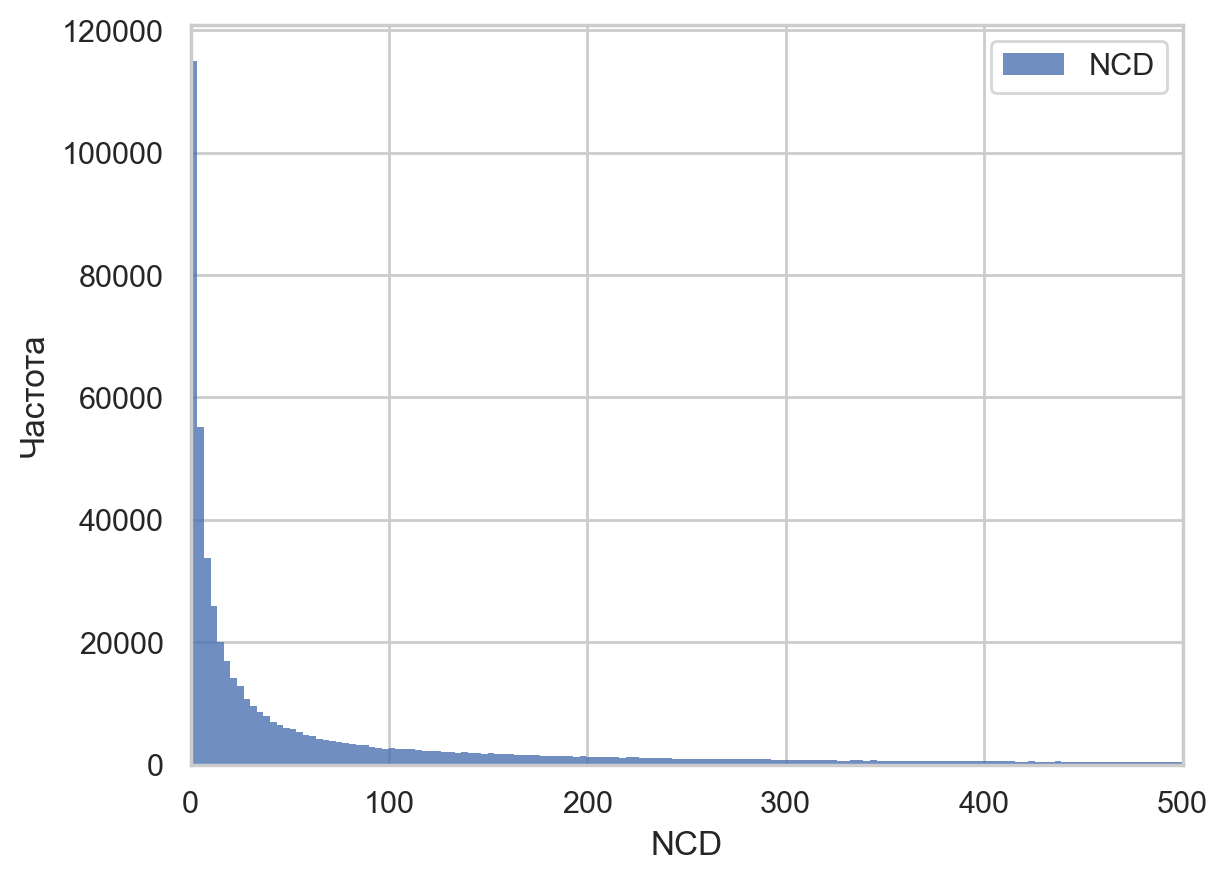

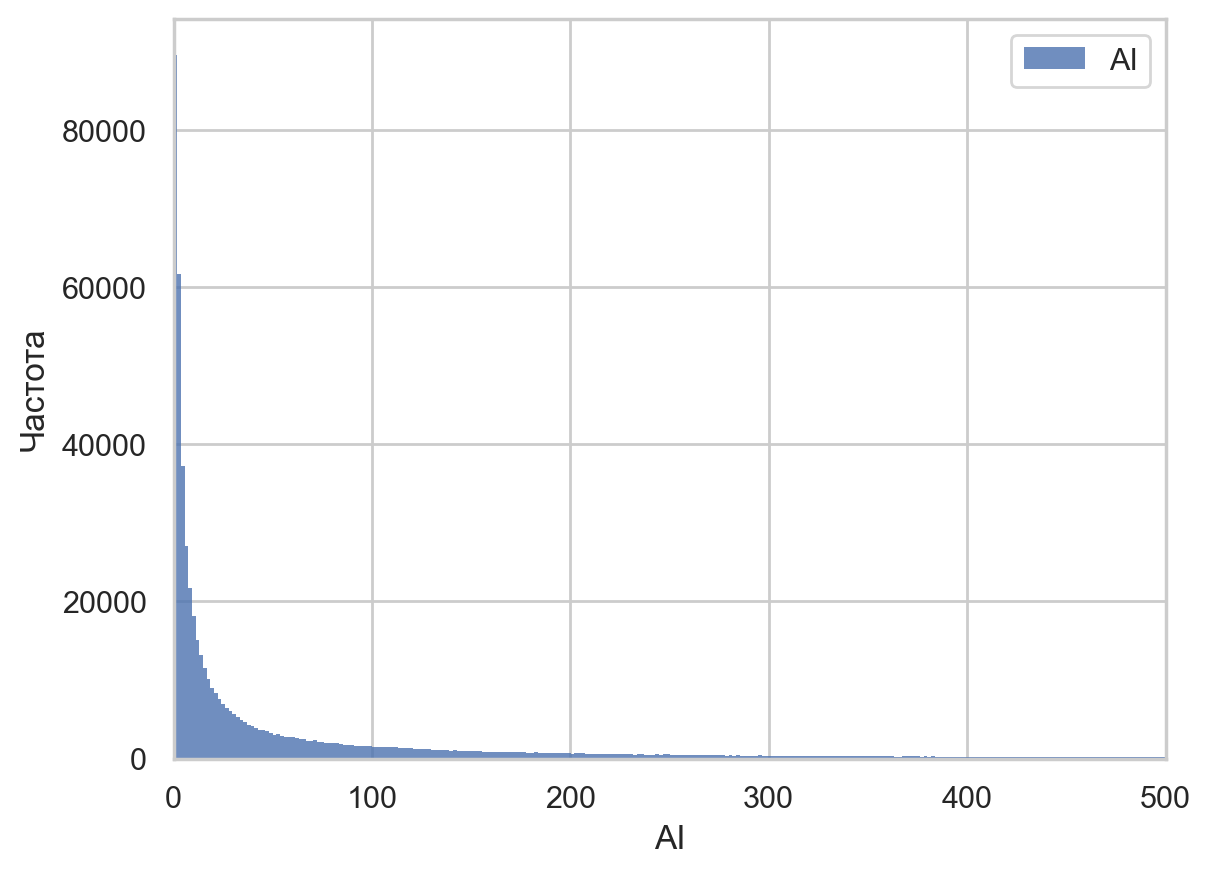

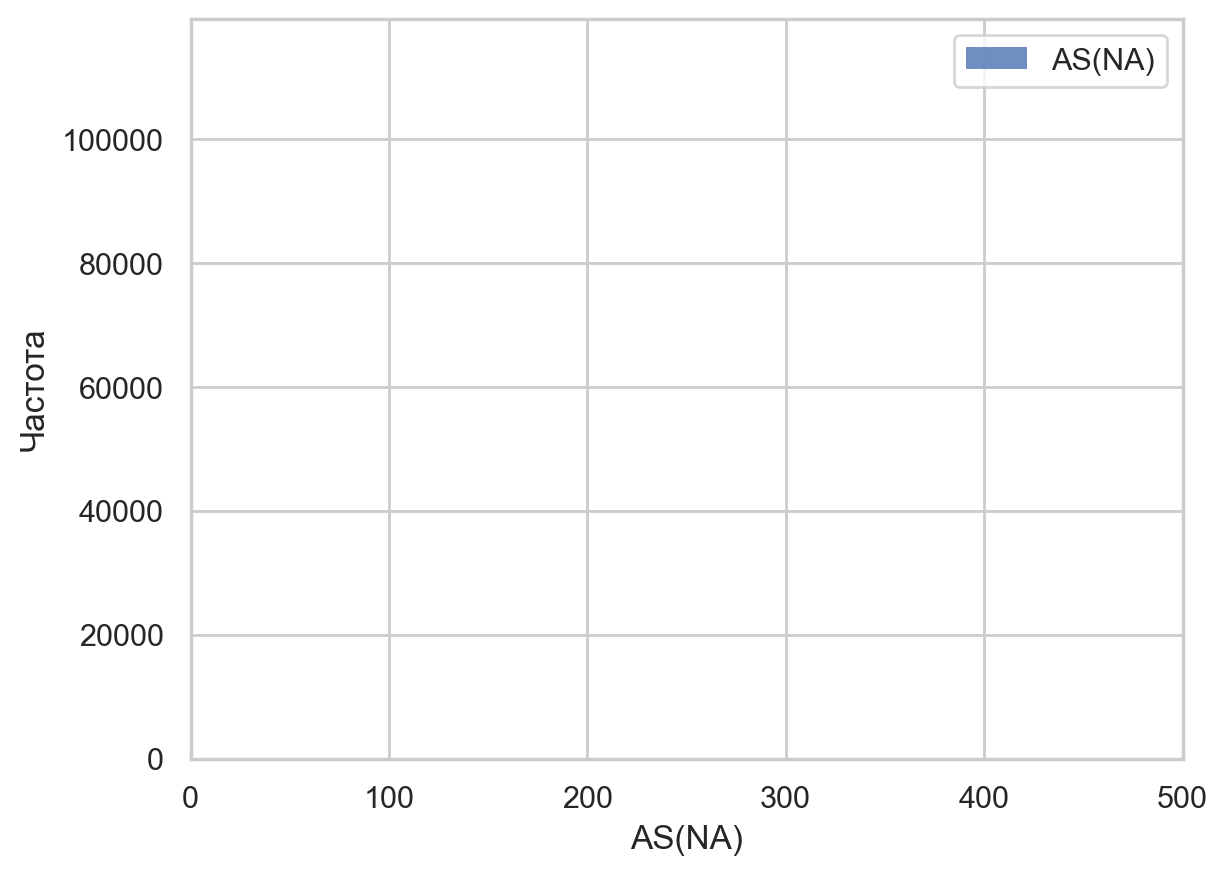

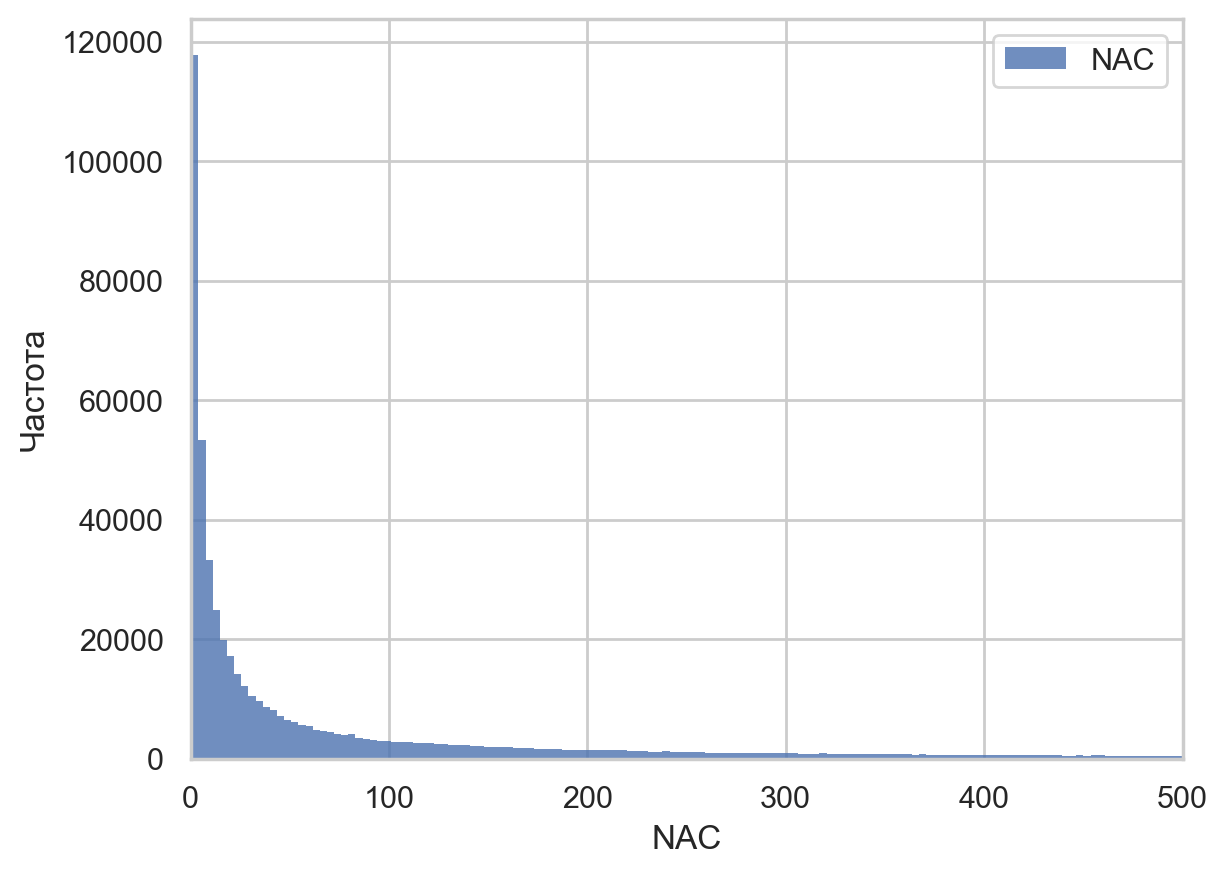

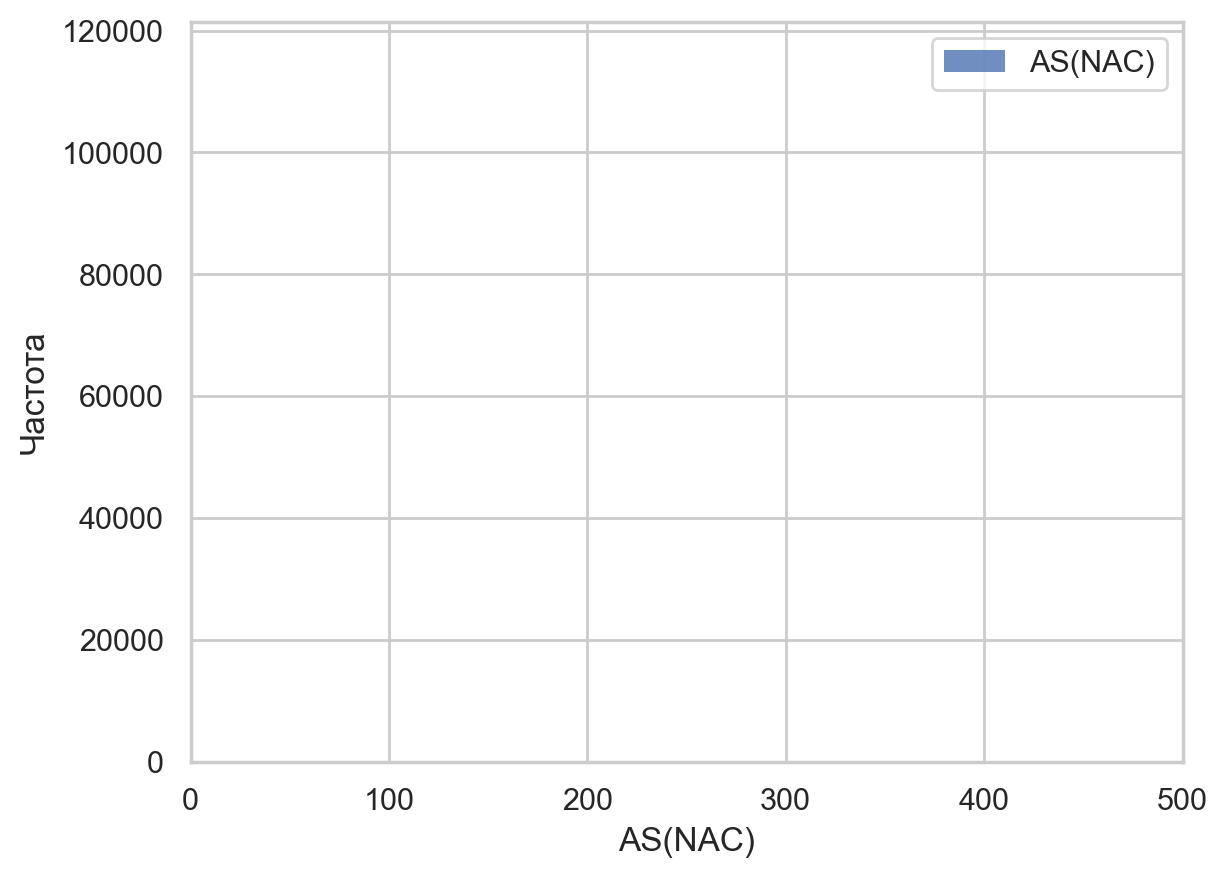

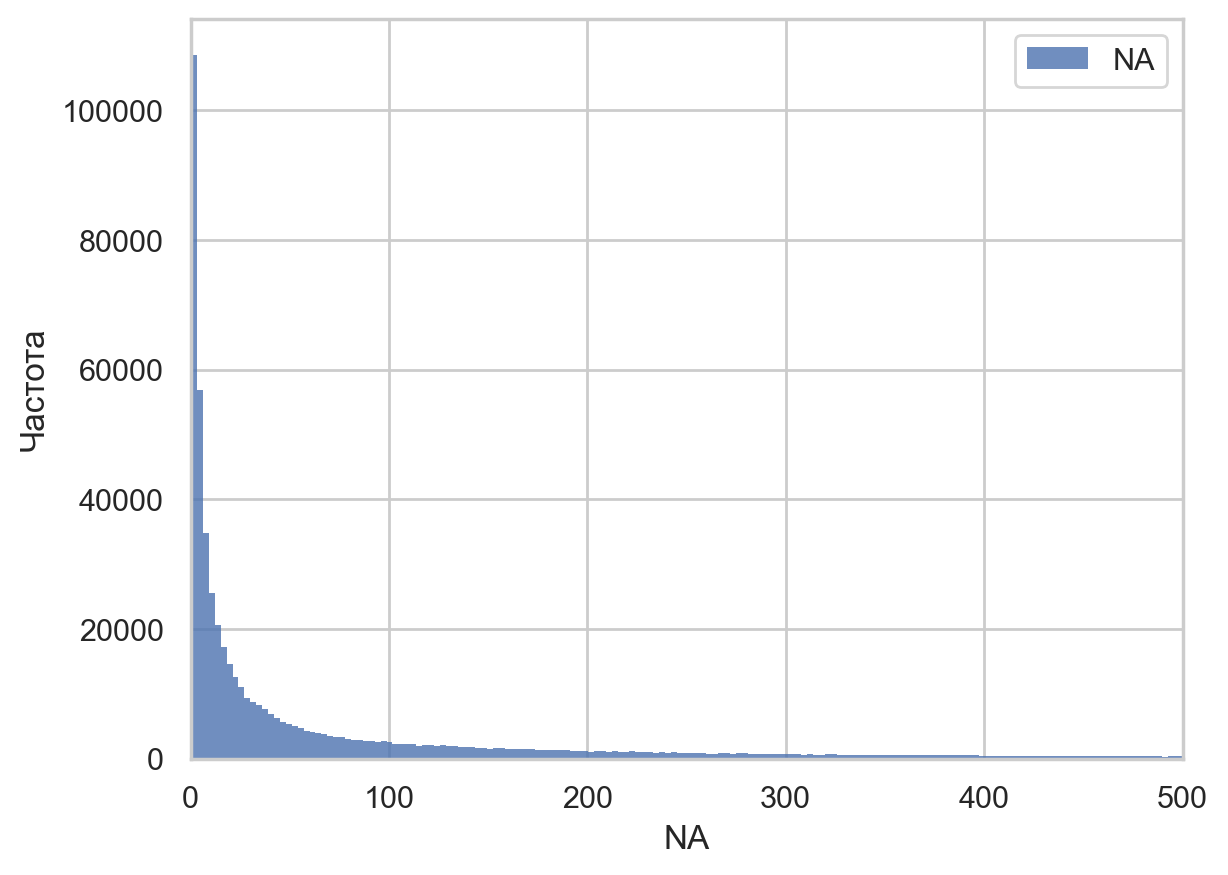

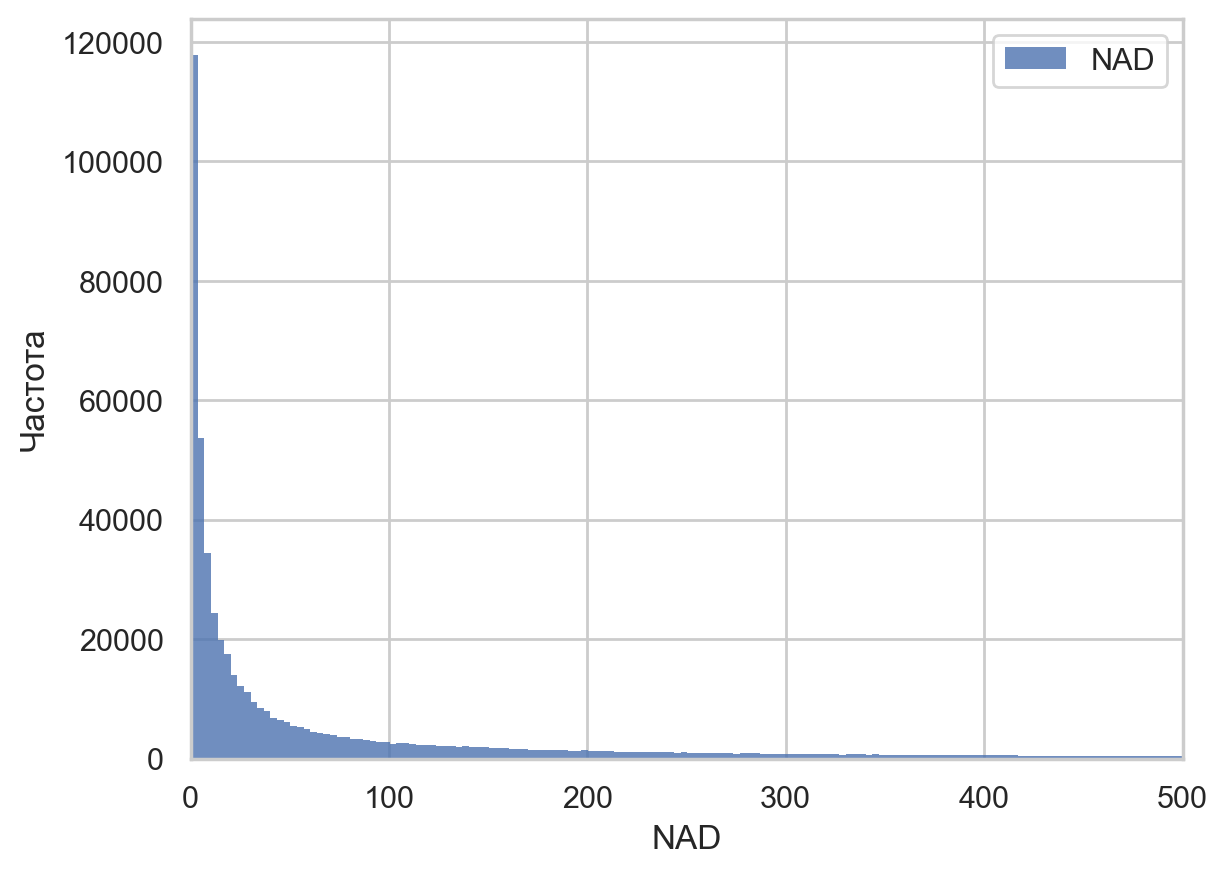

In [108]:
pop_features = ['NCD', 'AI', 'AS(NA)', 'NAC', 'AS(NAC)', 'NA', 'NAD']

for feat in pop_features:
    sns.histplot(data=df_timed[feat], alpha=0.8, label=feat)
    plt.xlabel(feat)
    plt.ylabel('Частота')
    plt.legend()
    plt.xlim(0, 500)
    plt.show()

In [109]:
df_timed = df_timed.drop(columns=['AI', 'AS(NA)', 'NAC', 'AS(NAC)', 'NA', 'NAD'])

Также сильно скоррелированы $BL_i$ и $CS_i$, $ADL_i$ и $AT_i$, оставим только 1 переменную в каждой группе из двух:

In [110]:
df_timed = df_timed.drop(columns=['CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6'])
df_timed = df_timed.drop(columns=['ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6'])

In [111]:
corr_matrix = df_timed.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,NCD
BL_0,1.00,-0.07,0.32,0.30,0.28,0.22,0.23,0.17,-0.03,0.07,0.06,0.04,0.02,0.02,0.09
BL_1,-0.07,1.00,0.32,0.29,0.28,0.21,0.21,-0.04,0.17,0.07,0.05,0.04,0.01,0.02,0.09
BL_2,0.32,0.32,1.00,0.38,0.36,0.27,0.28,0.06,0.05,0.23,0.08,0.06,0.02,0.02,0.10
BL_3,0.30,0.29,0.38,1.00,0.33,0.23,0.22,0.05,0.05,0.08,0.20,0.05,0.02,0.01,0.09
BL_4,0.28,0.28,0.36,0.33,1.00,0.21,0.19,0.05,0.05,0.08,0.06,0.18,0.01,0.01,0.09
BL_5,0.22,0.21,0.27,0.23,0.21,1.00,-0.01,0.04,0.04,0.06,0.04,0.02,0.12,-0.03,0.07
BL_6,0.23,0.21,0.28,0.22,0.19,-0.01,1.00,0.04,0.03,0.06,0.03,0.02,-0.04,0.10,0.07
AT_0,0.17,-0.04,0.06,0.05,0.05,0.04,0.04,1.00,0.31,0.31,0.22,0.14,0.13,0.13,0.01
AT_1,-0.03,0.17,0.05,0.05,0.05,0.04,0.03,0.31,1.00,0.39,0.25,0.18,0.13,0.13,0.01
AT_2,0.07,0.07,0.23,0.08,0.08,0.06,0.06,0.31,0.39,1.00,0.36,0.25,0.13,0.15,0.02


In [112]:
df_timed.columns

Index(['BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'AT_0', 'AT_1',
       'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NCD'],
      dtype='object')

Теперь почти все регрессоры не так сильно скоррелированы.

Рассмотрим распределение по каждому из оставшихся признаков:

**Burstiness Level (BL)**

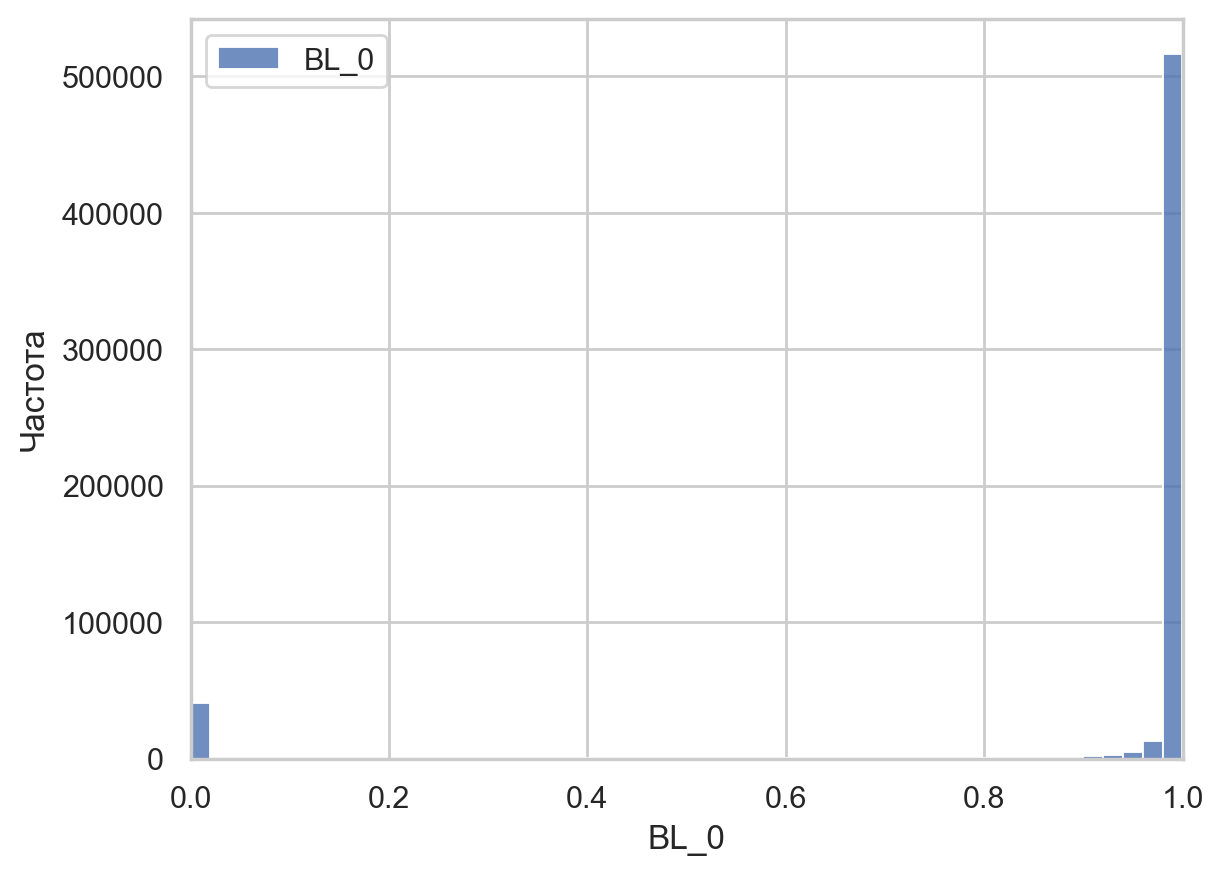

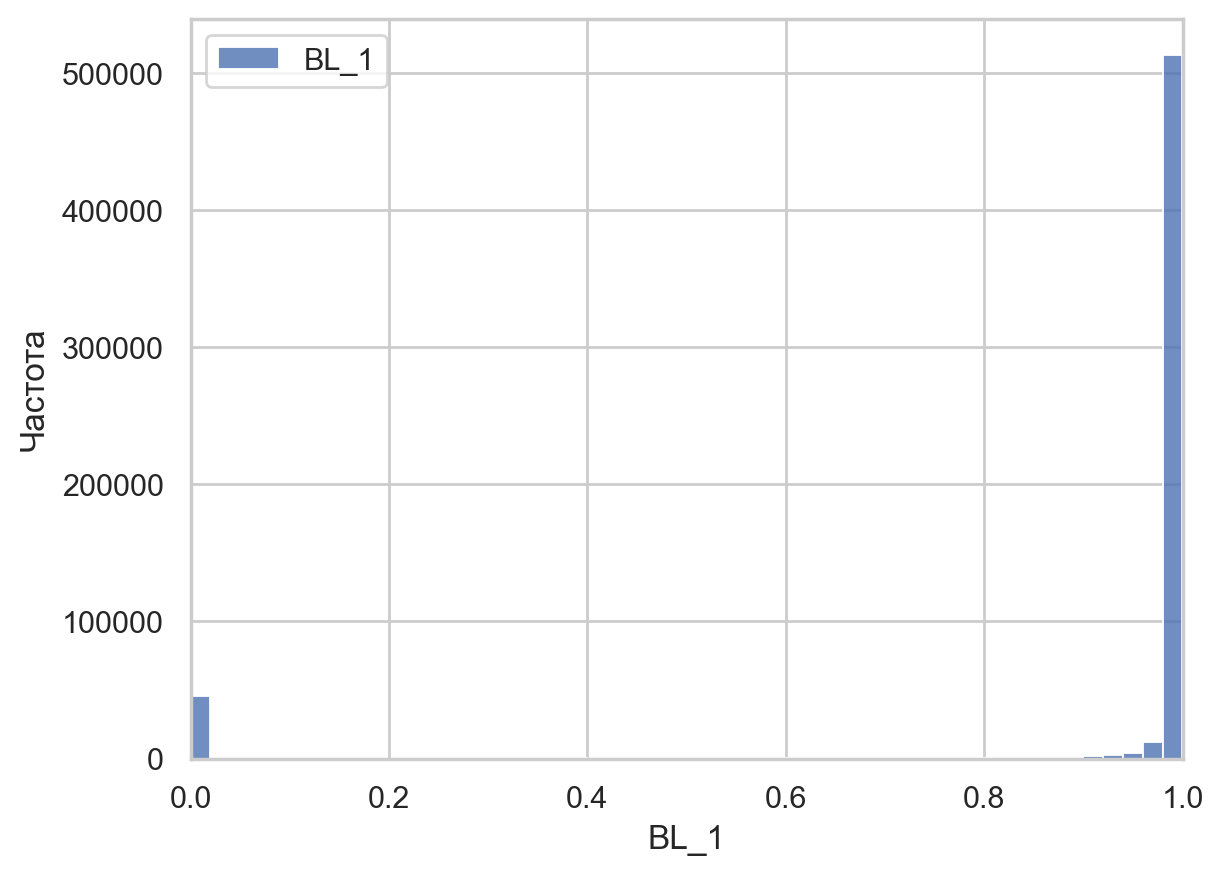

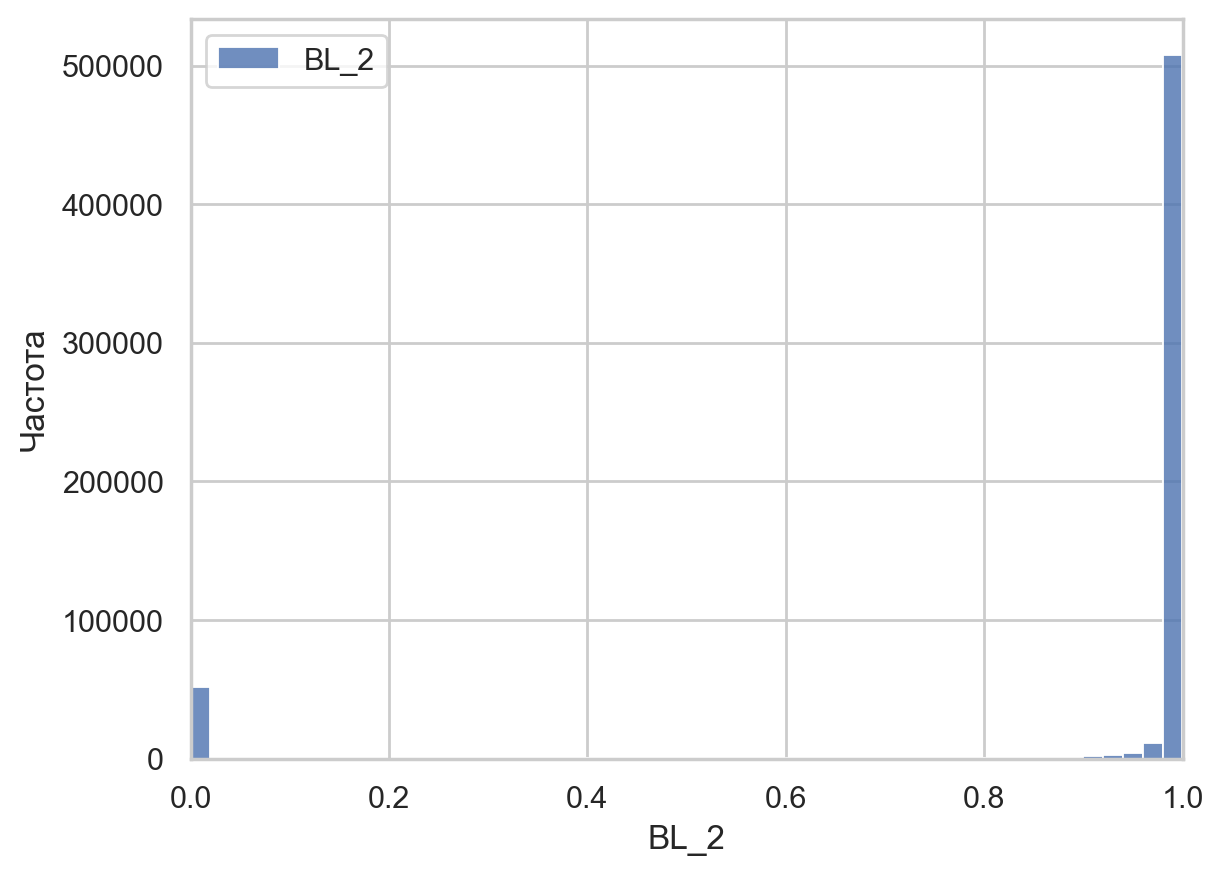

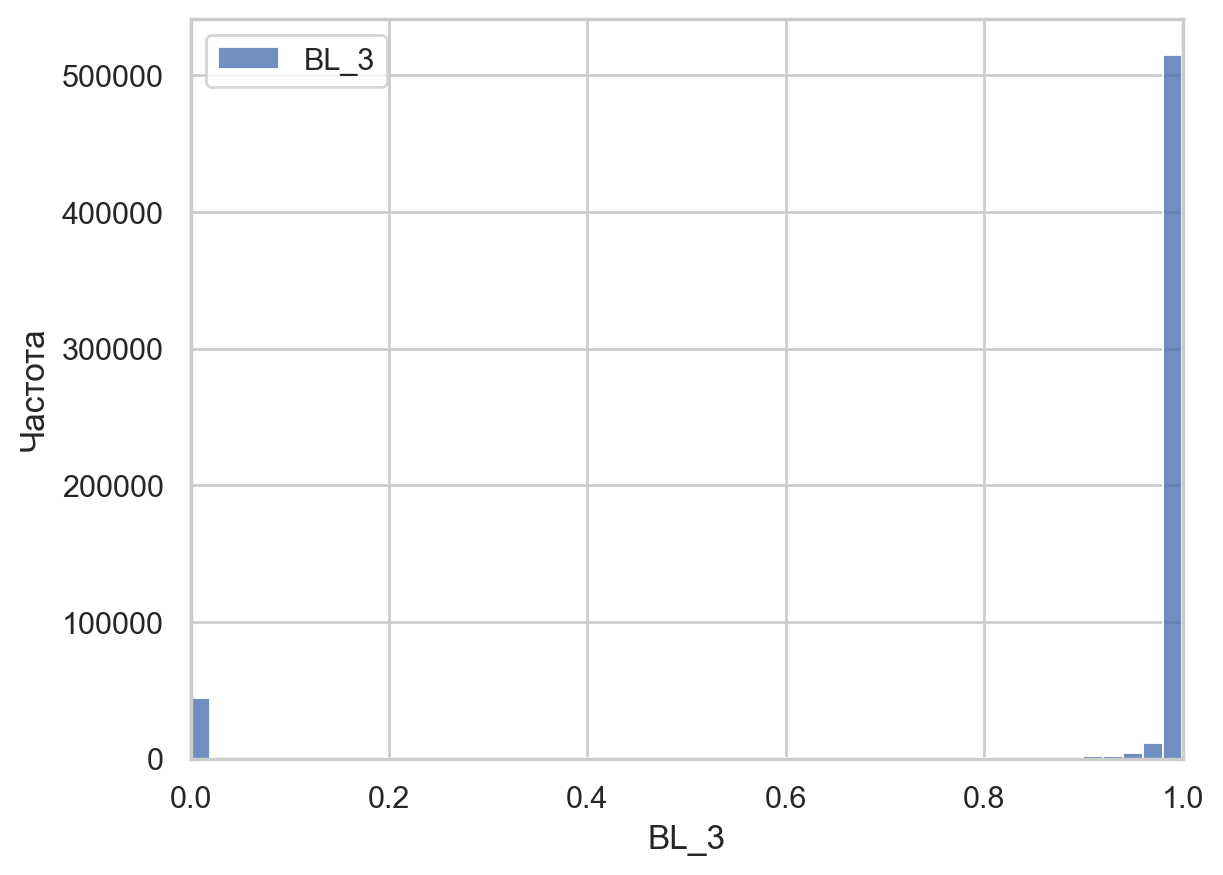

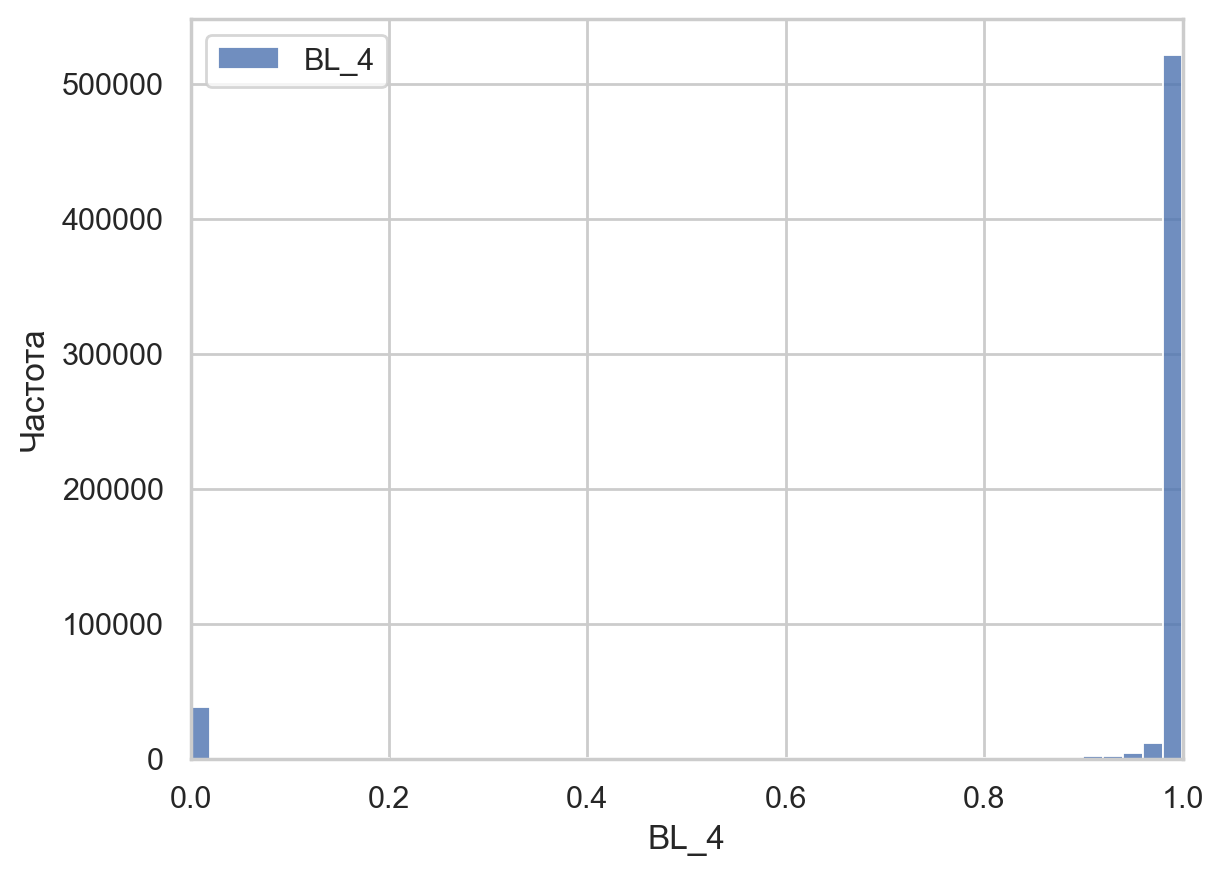

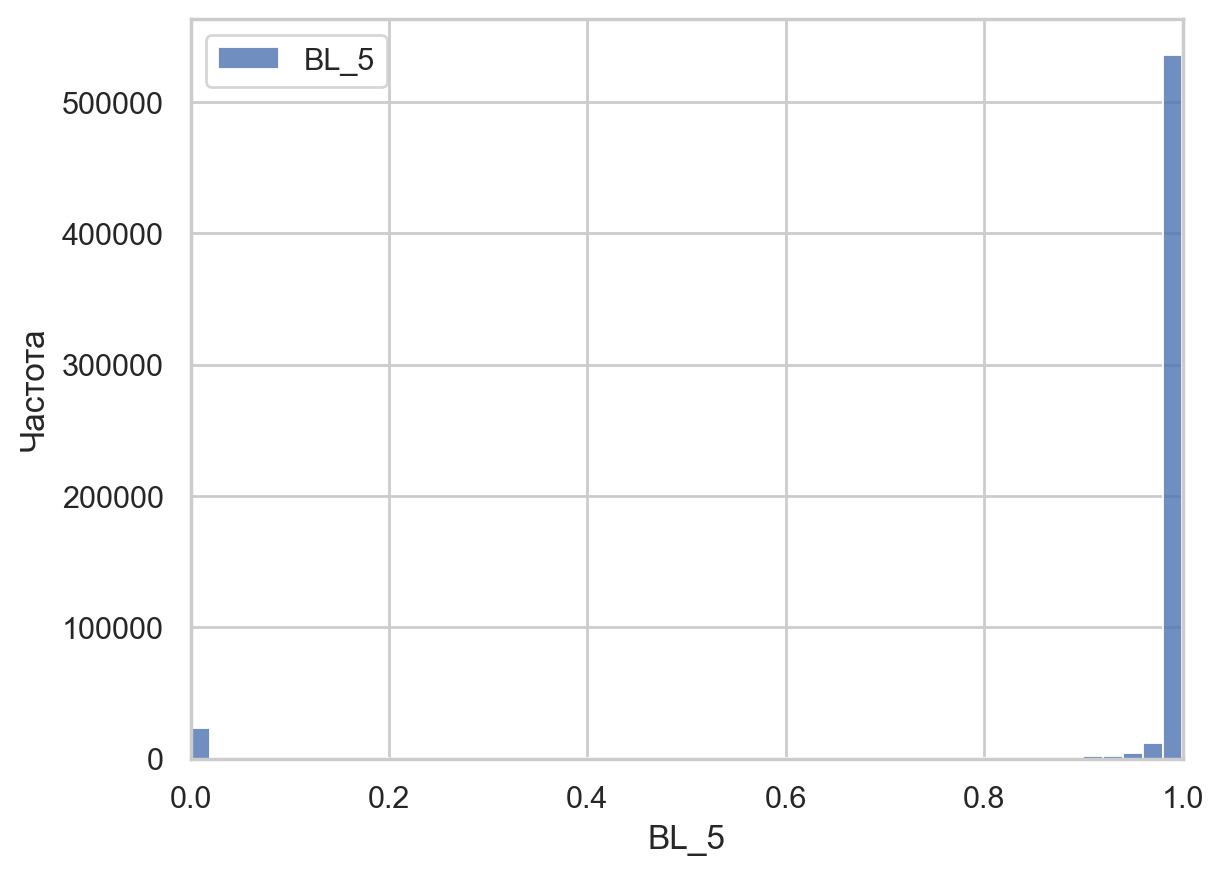

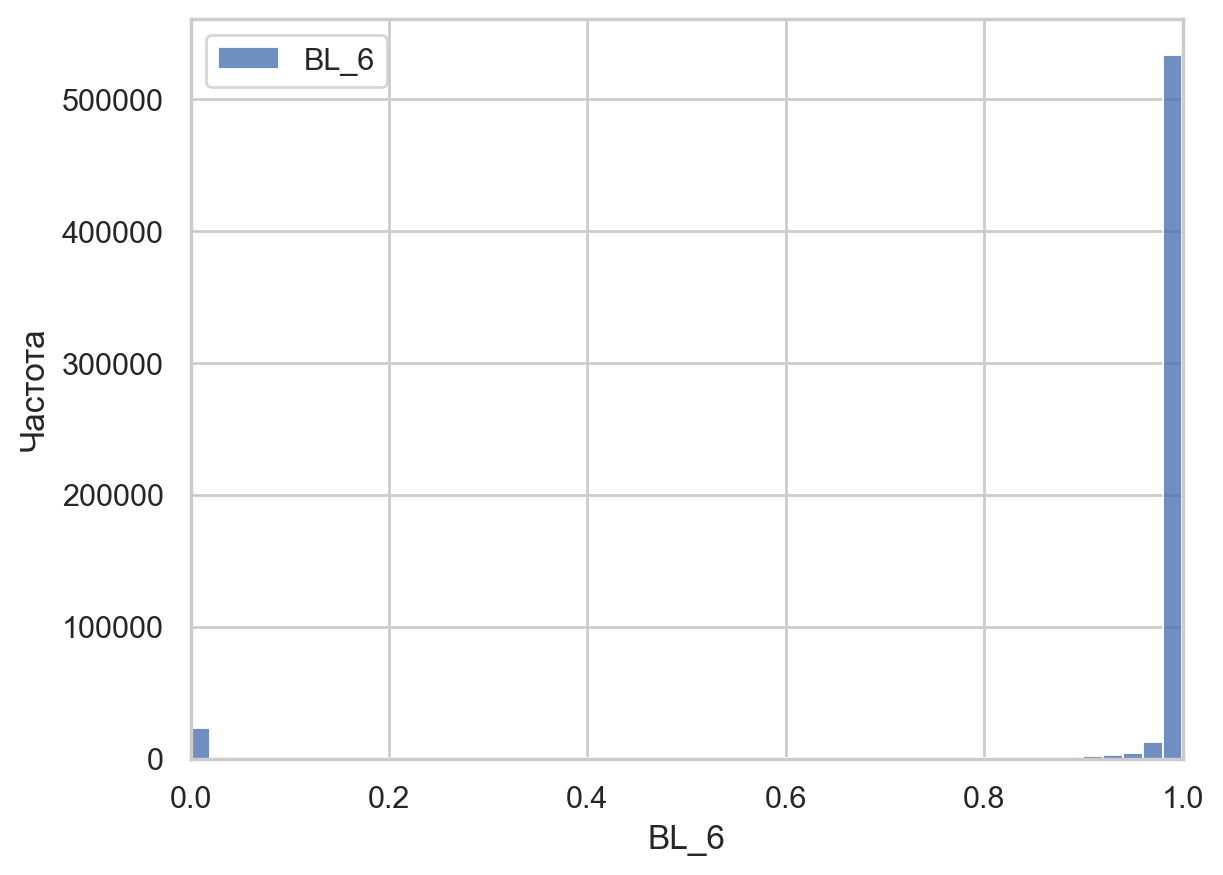

In [113]:
for i in range(7):
    feat = f'BL_{i}'
    sns.histplot(data=df_timed[feat], alpha=0.8, label=feat, bins=50)
    plt.xlabel(feat)
    plt.ylabel('Частота')
    plt.legend()
    plt.xlim(0, 1)
    plt.show()

**Popularity_agg**

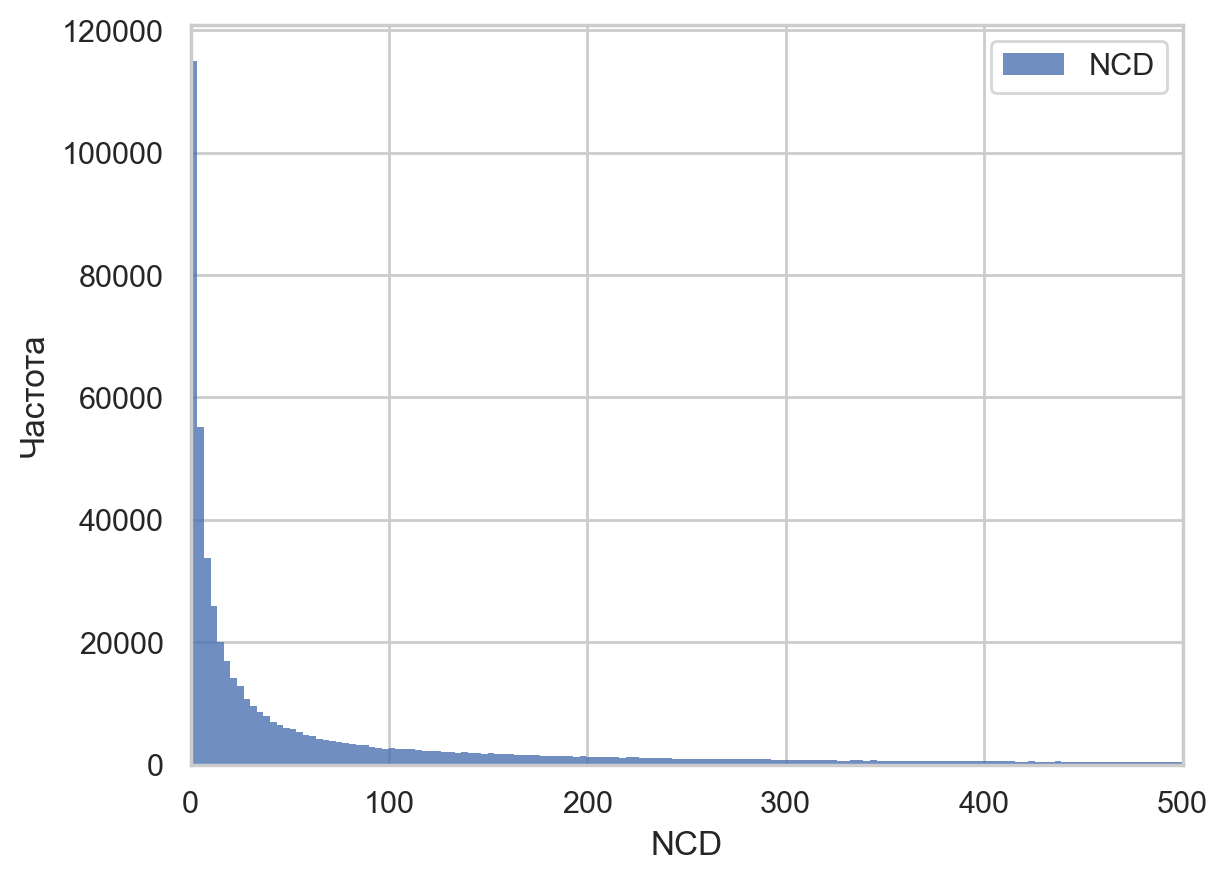

In [114]:
sns.histplot(data=df_timed['NCD'], alpha=0.8, label='NCD')
plt.ylabel('Частота')
plt.legend()
plt.xlim(0, 500)
plt.show()

**Author Interaction (AT)**

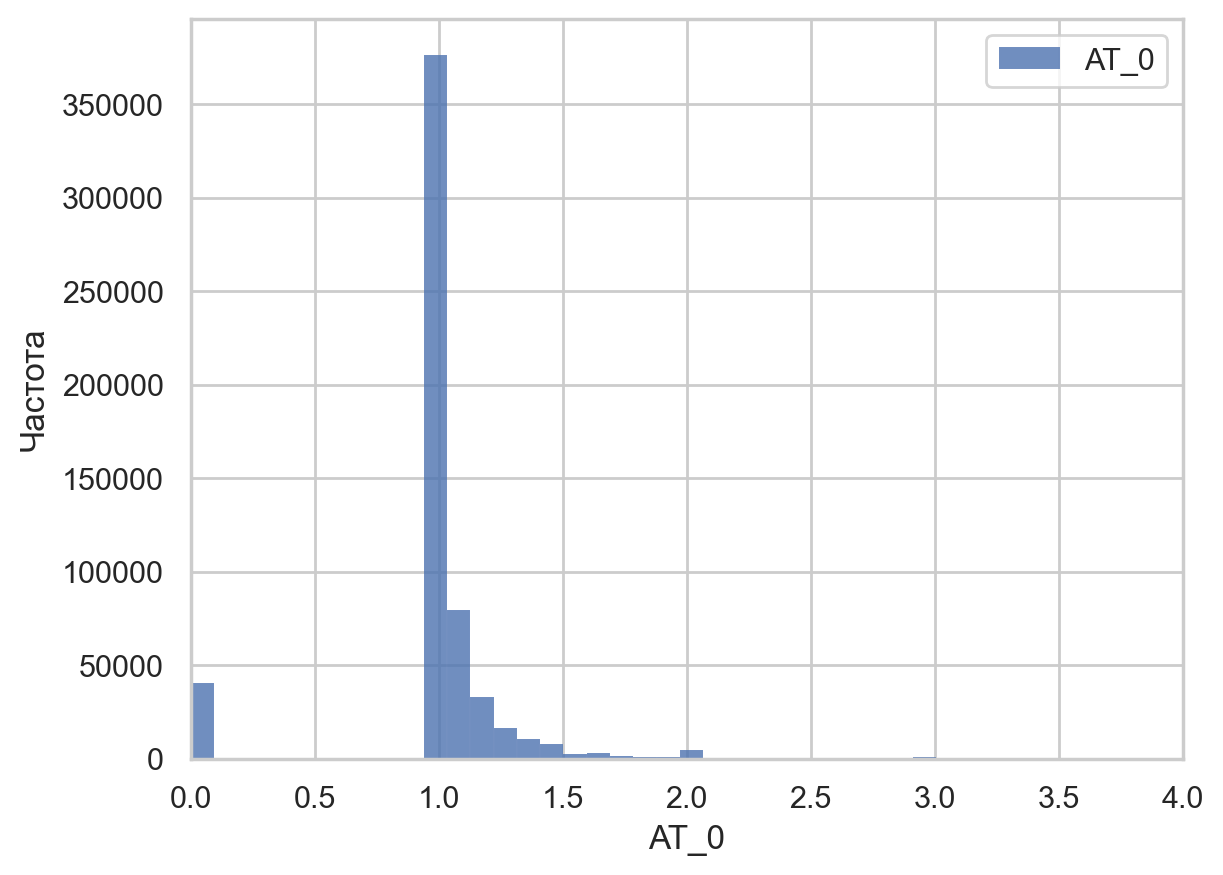

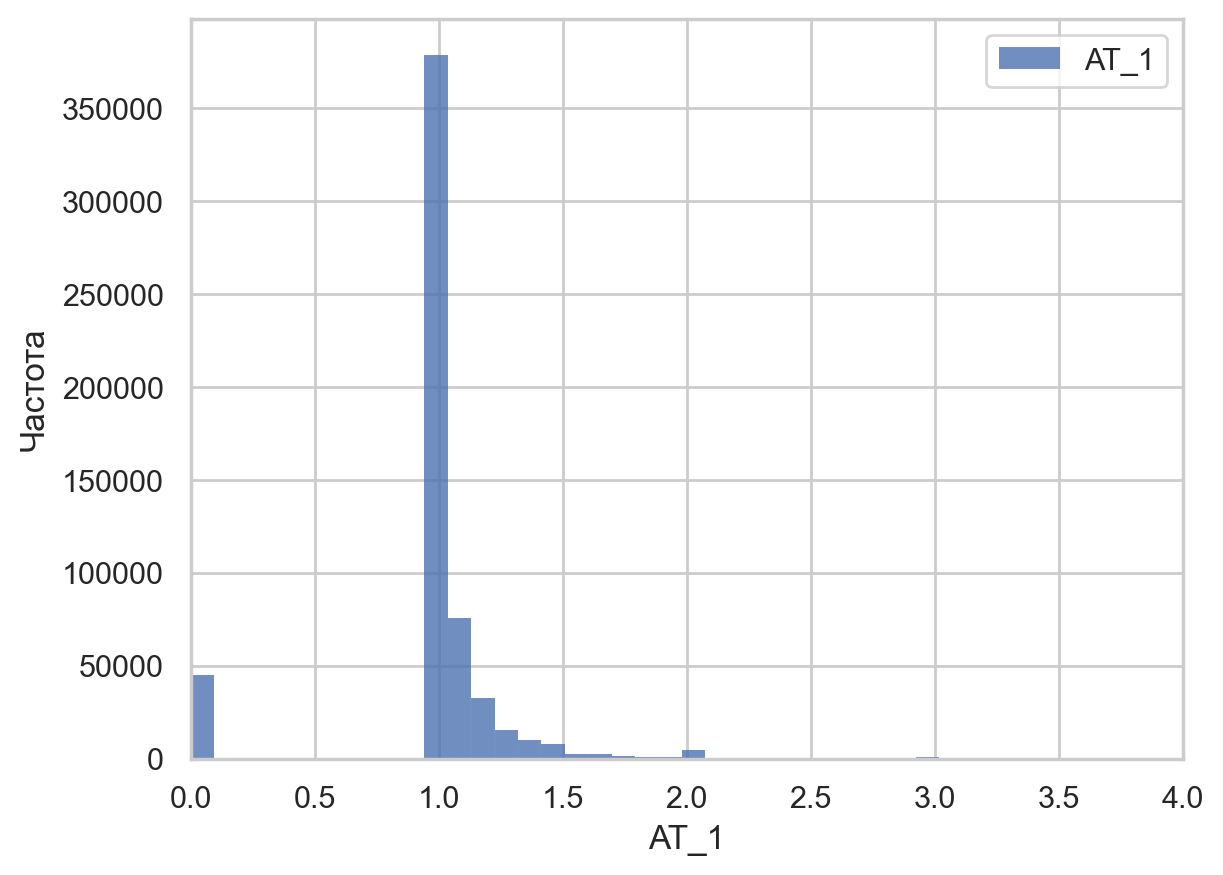

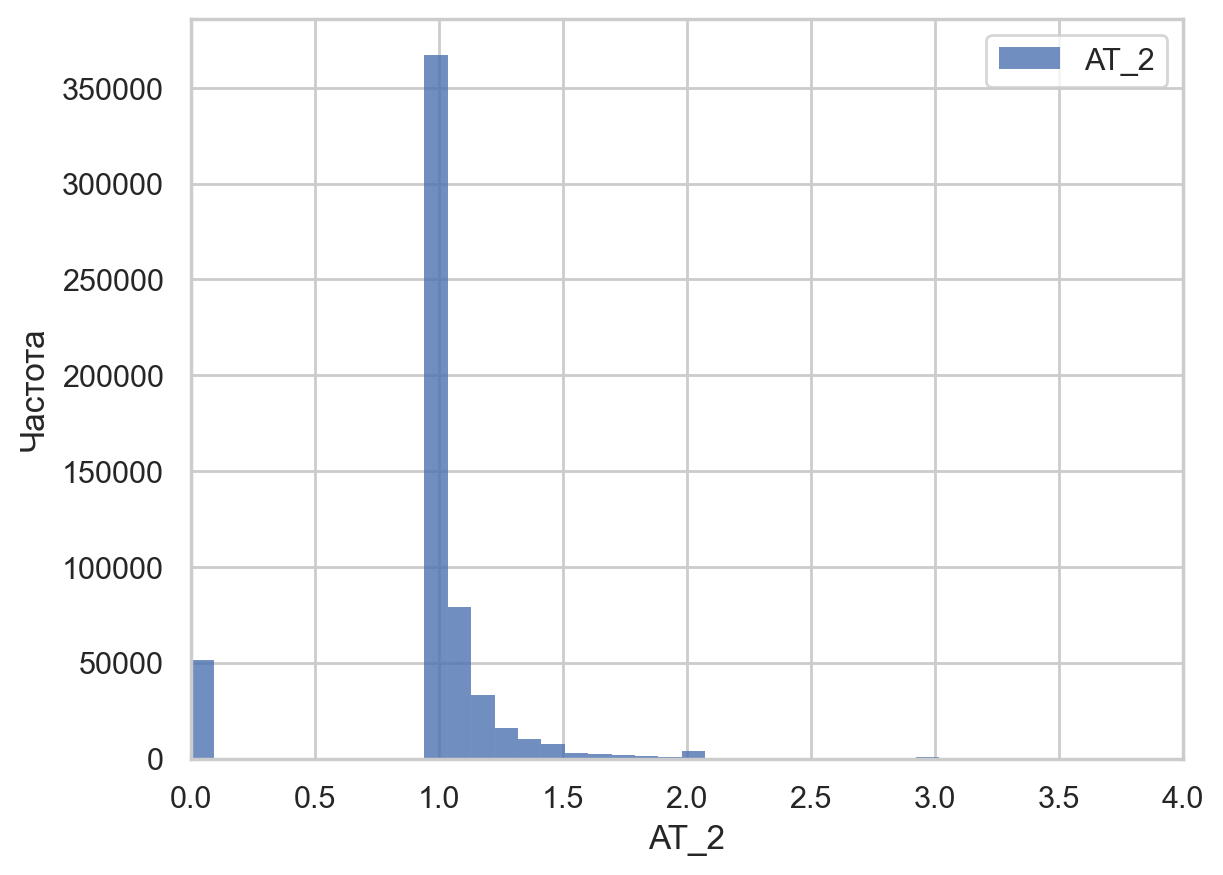

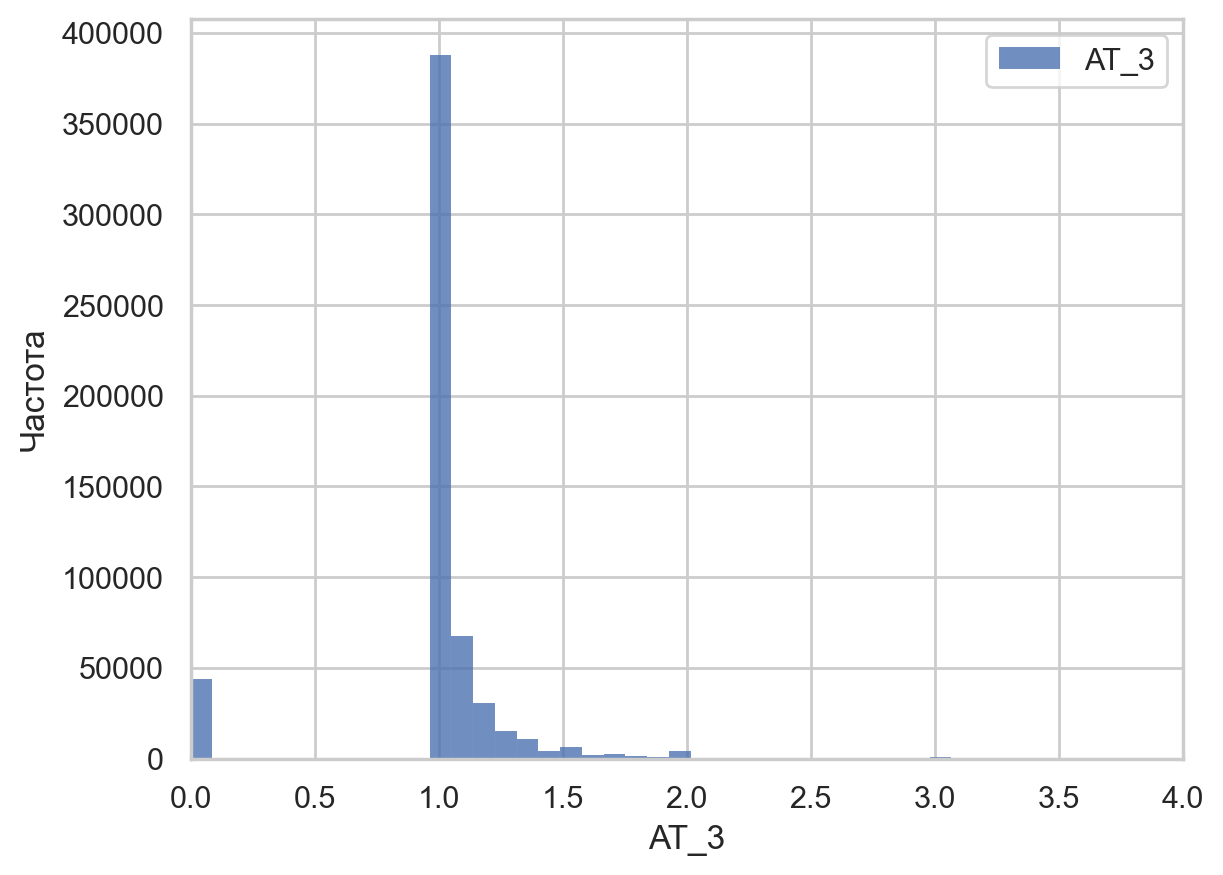

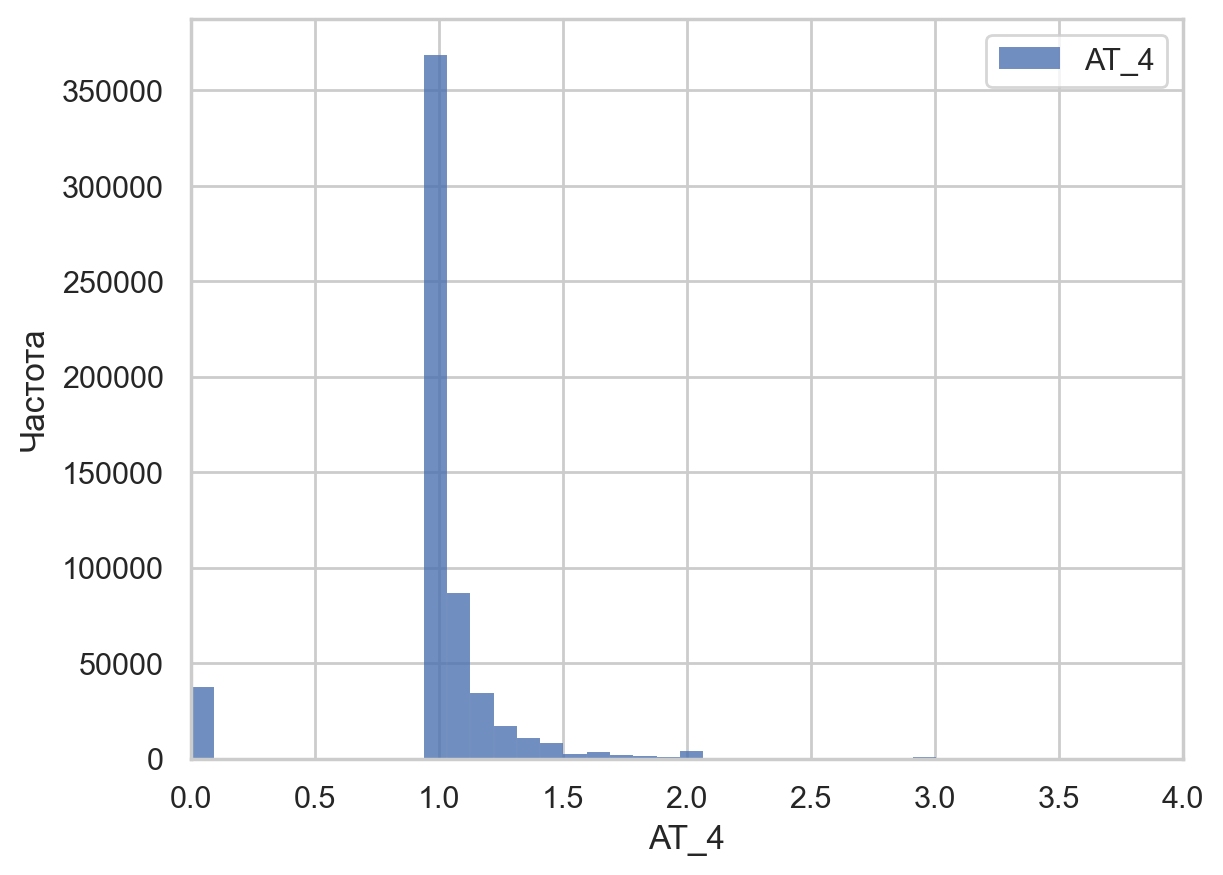

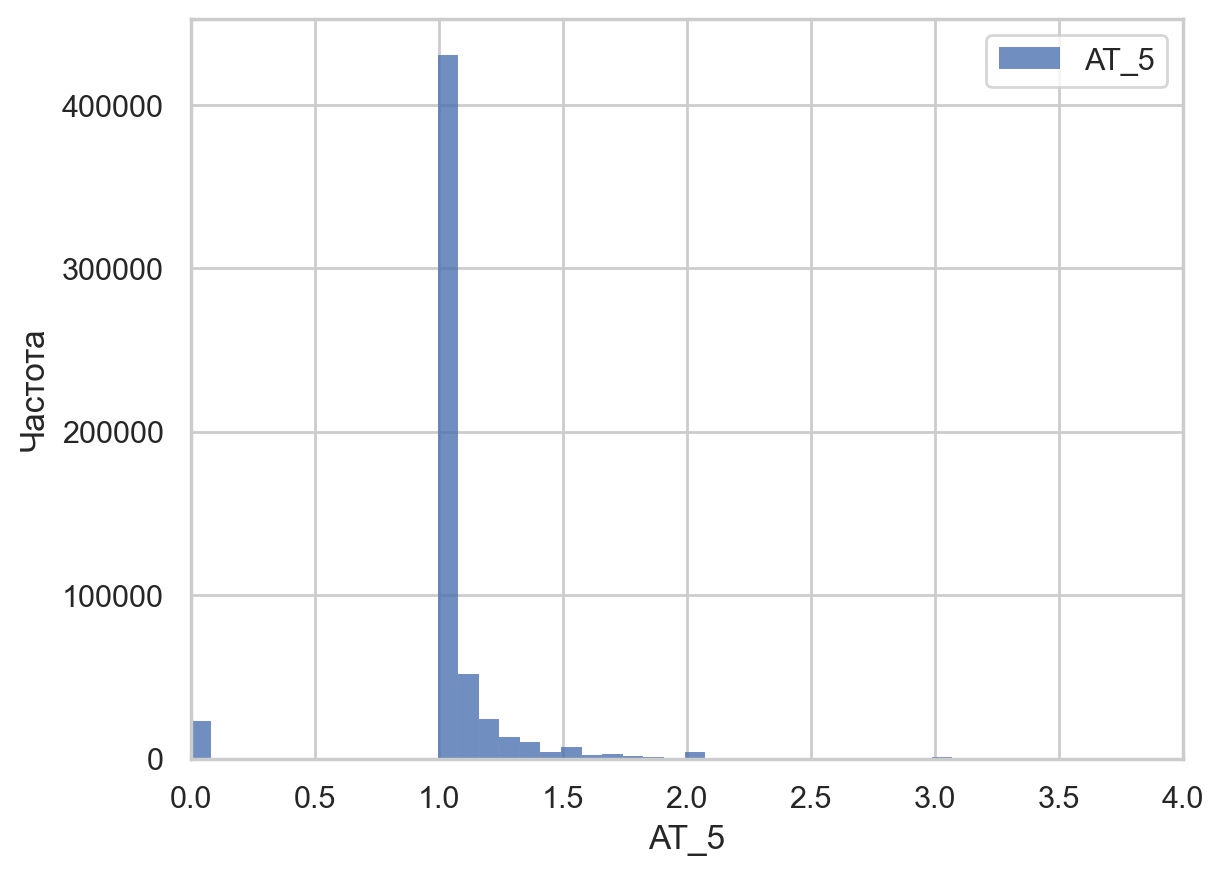

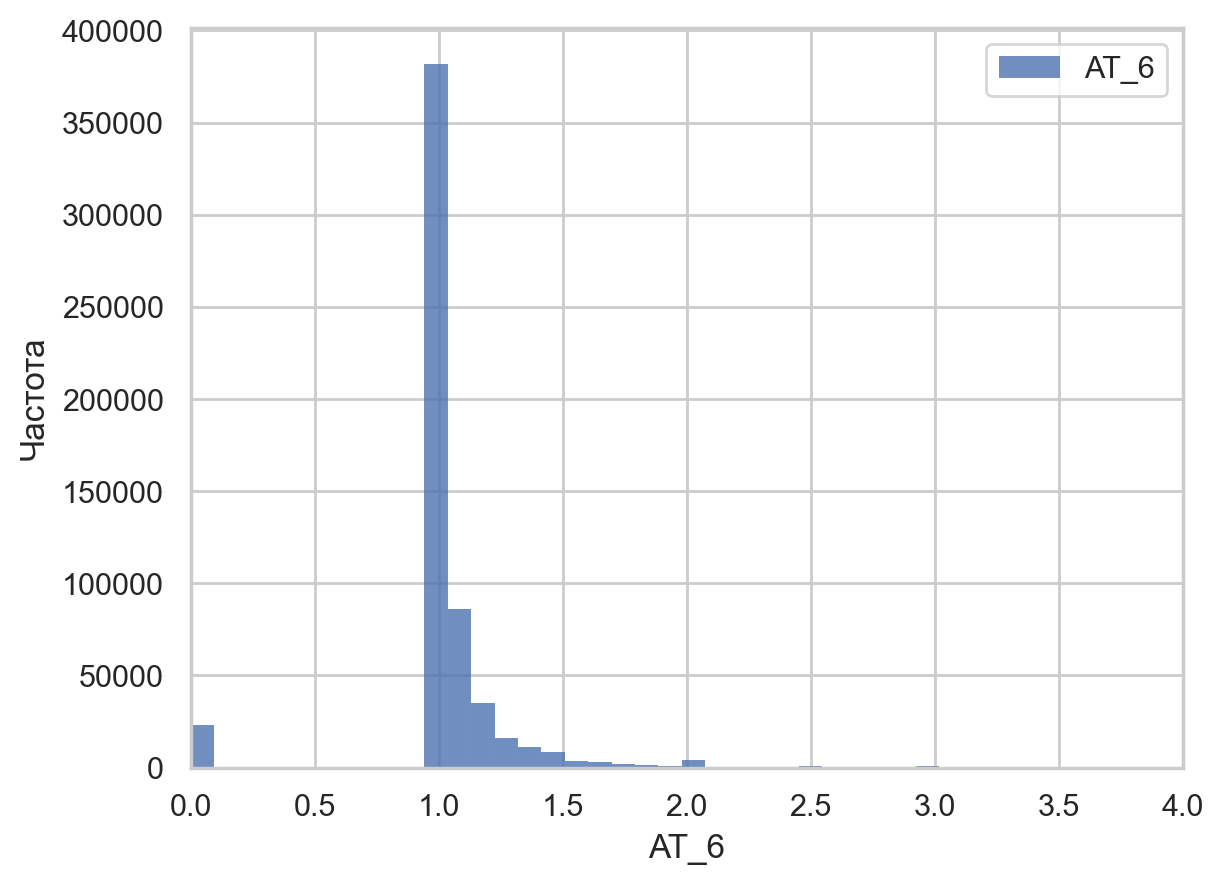

In [115]:
for i in range(7):
    feat = f'AT_{i}'
    sns.histplot(data=df_timed[feat], alpha=0.8, label=feat, bins=3000)
    plt.xlabel(feat)
    plt.ylabel('Частота')
    plt.legend()
    plt.xlim(0, 4)
    plt.show()


Попробуем построить **линейную регрессию** на основе полученных признаков

In [117]:
twitter_dt['NCD'] = (twitter_dt['NCD_0'] + twitter_dt['NCD_1'] + twitter_dt['NCD_2'] + twitter_dt['NCD_3'] + twitter_dt['NCD_4'] + twitter_dt['NCD_5'] + twitter_dt['NCD_6'])/7
y = twitter_dt['MNAD']
X = twitter_dt[['BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'AT_0', 'AT_1',
       'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NCD']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
# intercept = model.intercept_
print("Коэффициенты регрессии:", coefficients)
# print("Интерсепт (смещение):", intercept)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Средняя квадратичная ошибка (MSE):", mse)

Коэффициенты регрессии: [-4.02784031 -8.04244901 -2.62889708 -1.29581213  0.61154193 -0.10076496
  1.16979904 -0.46461827 -0.40406432 -0.05577026 -0.02774371  0.02563295
 -0.0461082  -0.29148895  1.0914618 ]
Средняя квадратичная ошибка (MSE): 56917.27884319282


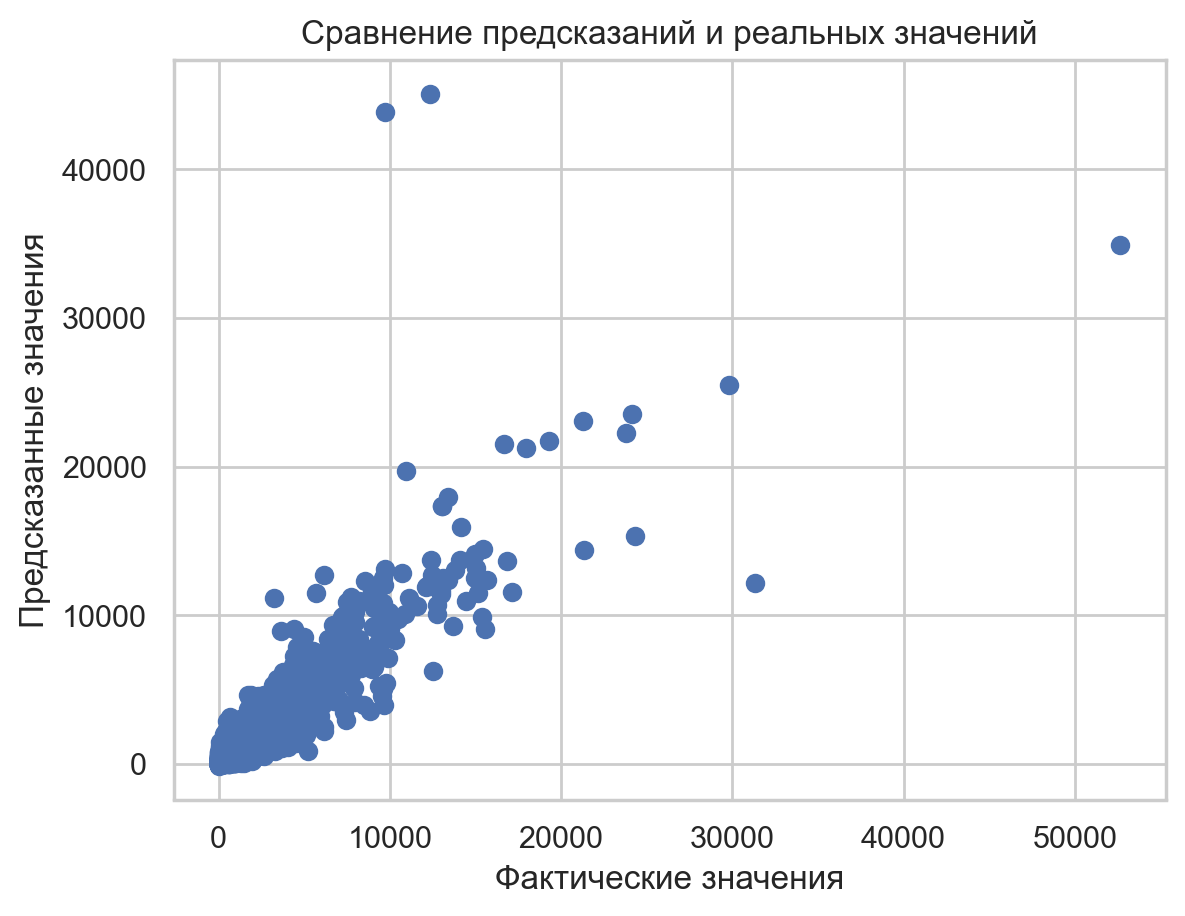

In [118]:
plt.scatter(y_test, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказаний и реальных значений')
plt.show()